In [2]:
## Setting up notebook 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows', None)

## Problem 1 [25 marks]: Eurovision Winners Data Set

# Problem 3 [25 marks]: COVID-19

### 3A

In [12]:
df = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/owid-covid-data.csv')
display (df)
print('Column Headings:',list (df.keys()))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295836,ZWE,Africa,Zimbabwe,2023-03-12,264385.0,13.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295837,ZWE,Africa,Zimbabwe,2023-03-13,264391.0,6.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295838,ZWE,Africa,Zimbabwe,2023-03-14,264391.0,0.0,14.857,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295839,ZWE,Africa,Zimbabwe,2023-03-15,264391.0,0.0,10.857,5672.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Column Headings: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_

### 3B

In [13]:
print (df['date'].unique())

['2020-01-03' '2020-01-04' '2020-01-05' ... '2023-03-18' '2023-03-19'
 '2023-03-20']


### 3C

In [14]:
print ('number of unique countries in data set:',len(df['iso_code'].unique()))

number of unique countries in data set: 255


### 3D

In [15]:
df = df[df['iso_code'].str.contains("OWID_") == False]
df = df.reset_index()

In [16]:
print ('number of unique countries in data set:',len(df['iso_code'].unique()))

number of unique countries in data set: 237


### 3E

In [17]:
df_v = df[df['new_vaccinations'].notna()]
df_v = df_v.reset_index()

earliest_date = df_v['date'].min()
print (earliest_date)

2020-12-09


### 3F

In [18]:
df_v['total_vaccinations_per_million'] = 10000 * df_v['total_vaccinations_per_hundred']

### 3G

In [19]:
df_v['date'] = df_v['date'].apply(pd.to_datetime)
df_v['DaysSince3Dec20'] = (df_v['date']-df_v['date'].min()).dt.days


### 3H

In [20]:
min_deaths = df_v.groupby('iso_code')['total_deaths_per_million'].min() #earliest date deaths /mill

max_deaths = df_v.groupby('iso_code')['total_deaths_per_million'].max() #latest date deaths/mill

total_vax = df_v.groupby('iso_code')['total_vaccinations_per_hundred'].max()  #latest date vax/100

df_country =pd.DataFrame ({'total_vaccinations_per_hundred': total_vax, 'total_deaths_per_million(earliest date)':min_deaths , 'total_deaths_per_million(latest date)':max_deaths})
df_country['TotalDeathPerMSinceVac'] = (df_country.iloc[:, 2])-(df_country.iloc[:, 1])
df_country


,total_vaccinations_per_hundred,total_deaths_per_million(earliest date),total_deaths_per_million(latest date),TotalDeathPerMSinceVac
iso_code,,,,
ABW,163.88,864.182,2686.480,1822.298
AFG,29.70,69.757,190.378,120.621
AIA,17.40,NaN,NaN,NaN
ALB,96.32,438.726,1226.112,787.386
AND,23.88,1465.376,1502.950,37.574
...,...,...,...,...
VCT,67.19,96.192,1019.633,923.441
VNM,237.85,0.499,438.827,438.328
ZAF,63.53,813.238,1712.495,899.257


### 3I 

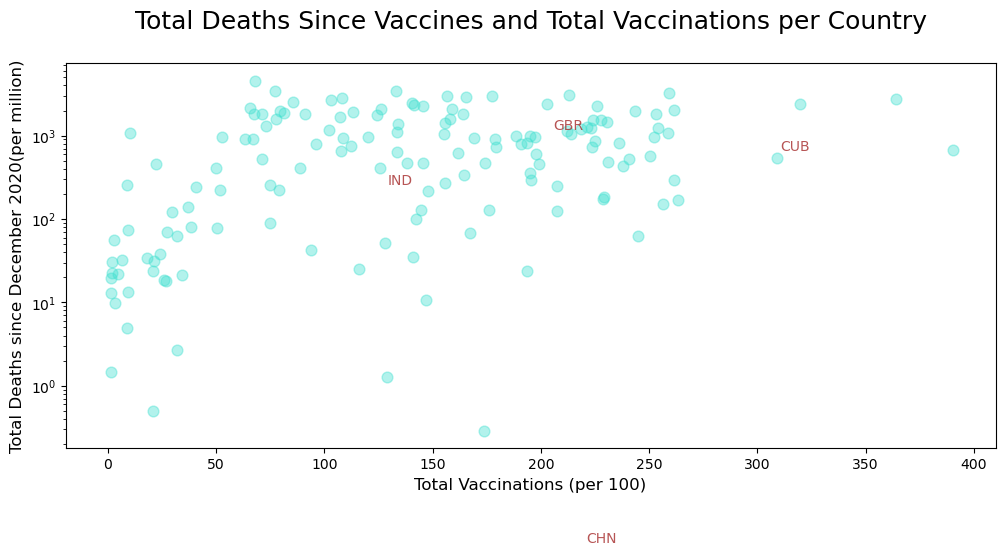

In [21]:
%matplotlib inline

plt.figure(figsize=(12,5))
plt.title('Total Deaths Since Vaccines and Total Vaccinations per Country', size = 18, pad = 25)
plt.ylabel('Total Deaths since December 2020(per million)', size = 12)
plt.xlabel('Total Vaccinations (per 100)', size = 12)


ax = plt.gca()
ax.set_yscale('log')

ax.text(220.84,0.013, "CHN", color = 'brown',alpha = 0.8) #CHN
ax.text(129.14,260.925, "IND", color = 'brown',alpha = 0.8) #IND
ax.text(205.72,1183.704, "GBR", color = 'brown',alpha = 0.8)
ax.text(310.42,665.960, "CUB", color = 'brown',alpha = 0.8)

plt.scatter(df_country ['total_vaccinations_per_hundred'],df_country['TotalDeathPerMSinceVac'], alpha=0.4, color ='turquoise',s=60);


### 3J

In [22]:
df_GBR = df_v[df_v['iso_code'].str.contains('GBR')]
df_GBR.drop(columns=['level_0','index'], 
        axis=1, 
        inplace=True)
df_GBR = df_GBR.reset_index(drop=True)

df_GBR.shape #Checking that its 424 rows

(602, 69)

### 3K

In [23]:
df_GBR['total_vaccinations_per_hundred_smoothed']= df_GBR['total_vaccinations_per_hundred'].rolling(window=7, center = True,min_periods=4 ).mean()

### 3L

In [24]:
#ZAF
df_ZAF = df_v[df_v['iso_code'].str.contains('ZAF')]
df_ZAF.drop(columns=['level_0','index'], 
        axis=1, 
        inplace=True)
df_ZAF = df_ZAF.reset_index(drop=True)

#KOR
df_KOR = df_v[df_v['iso_code'].str.contains('KOR')]
df_KOR.drop(columns=['level_0','index'], 
        axis=1, 
        inplace=True)
df_KOR = df_KOR.reset_index(drop=True)

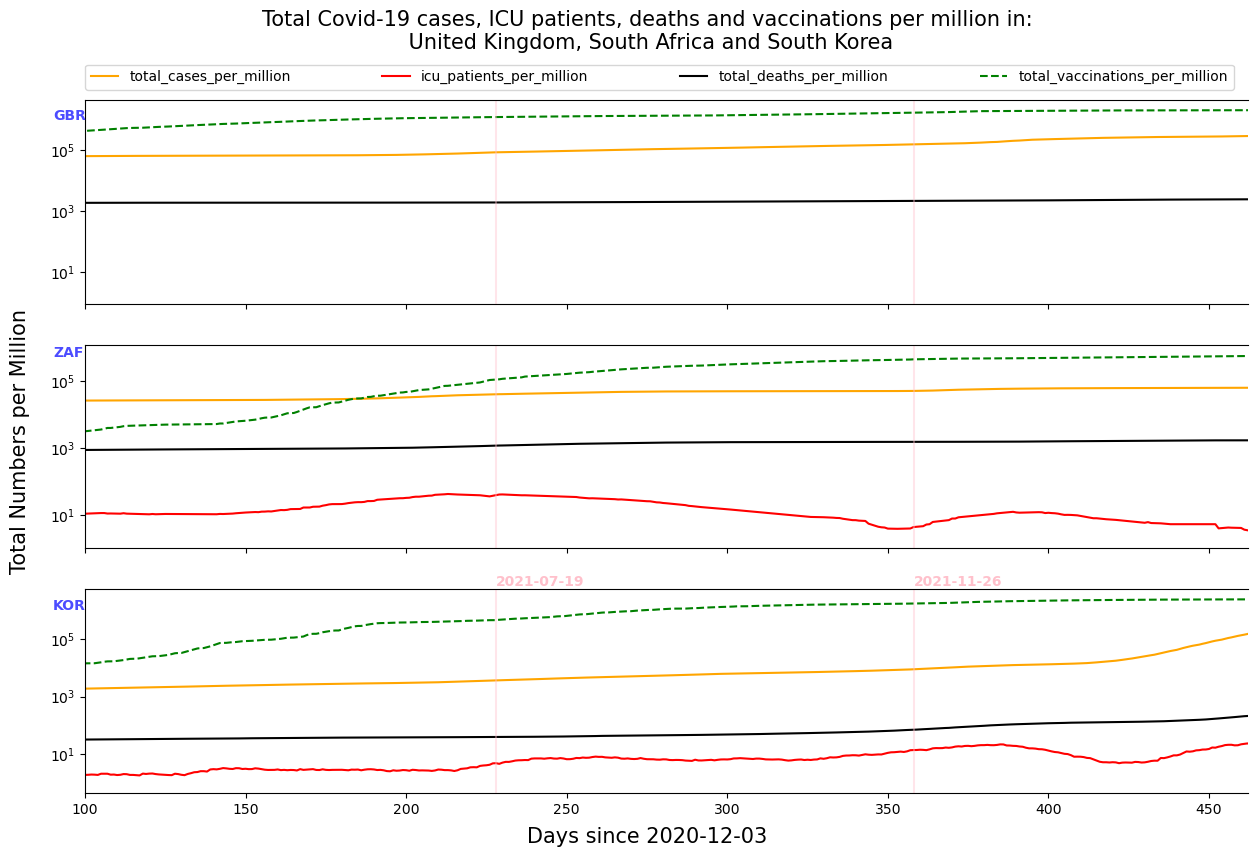

In [25]:
#figure
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(15,9),sharex = True)

plt.suptitle('Total Covid-19 cases, ICU patients, deaths and vaccinations per million in:\n United Kingdom, South Africa and South Korea',size=15,weight = 'ultralight')
fig.supxlabel('Days since 2020-12-03',size = 15, y = 0.05)
fig.supylabel('Total Numbers per Million',size = 15, x = 0.075)

#DATA 
x = 'DaysSince3Dec20'
y1 ='total_cases_per_million'
y2 = 'icu_patients_per_million'
y3 = 'total_deaths_per_million'
y4 = 'total_vaccinations_per_million'

data = [df_GBR,df_ZAF,df_KOR]

#subplot - axes
for z,i in enumerate (data) : 
    i.plot(x=x,y =[y1,y2,y3] ,ax=axes[z],legend =False,logy=True,color = ['orange','red','black','green'])
    i.plot(x=x,y =y4 ,ax=axes[z],legend =False,logy=True,color = 'green',linestyle = '--')
    axes[z].set_xlim(left=100,right =462)
    axes[z].set(xlabel=None)
    axes[z].axvline(x=228,ymin = 0, ymax = 1,color ='pink',alpha = 0.4 )
    axes[z].axvline(x=358,ymin = 0, ymax = 1,color ='pink',alpha = 0.4 )
    axes[z].spines["right"].set_visible(False)
    
#titles
axes[0].legend(ncol = 4, loc = (0,1.05),mode = 'expand')

axes[0].text(x=90,y=1000000,s = 'GBR', color = 'blue',weight='demi',alpha = 0.7)
axes[1].text(x=90,y=500000,s = 'ZAF', color = 'blue',weight='demi',alpha = 0.7)
axes[2].text(x=90,y=1000000,s = 'KOR', color = 'blue',weight='demi',alpha = 0.7)

#specific dates 
axes[2].text(x=228,y=7000000,s = '2021-07-19', color = 'pink',weight='demi',alpha = 1)
axes[2].text(x=358,y=7000000,s = '2021-11-26', color = 'pink',weight='demi',alpha = 1);



### Extra analysis

In [51]:
def make_dfs (x):
    y = df[df['iso_code'].str.contains(x)]
    y['date'] = y['date'].apply(pd.to_datetime)
    y['Days Since 1st Death'] =(y['date']-(y.loc[df['total_deaths'] == 1, 'date'].iloc[0])).dt.days
    y = y[y['Days Since 1st Death']<=150]
    y = y[['iso_code','total_deaths','stringency_index','Days Since 1st Death']]
    y = y[y['stringency_index'].notna()]
    y = y.reset_index(drop=True)
    return y

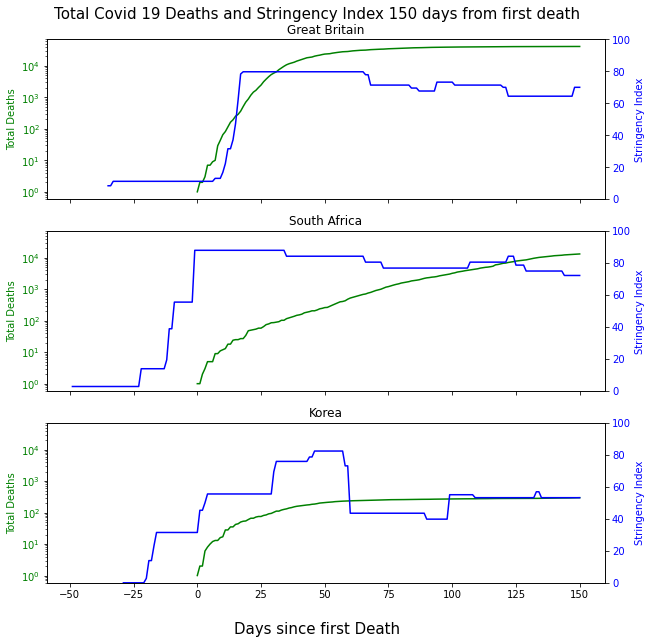

In [52]:
fig,(ax,ax1,ax2) =plt.subplots (3,1,figsize = (10,10), sharex = True,sharey = True)

plt.suptitle('Total Covid 19 Deaths and Stringency Index 150 days from first death',size=15,weight = 'ultralight',y=0.925)
fig.supxlabel('Days since first Death',size = 15, y = 0.05)

isocodes = ['GBR','ZAF','KOR']
axes = [ax,ax1,ax2]

ax.set (title = 'Great Britain')
ax1.set (title = 'South Africa')
ax2.set (title = 'Korea')


for i,z in zip (isocodes,axes):    

    axa=z.twinx()
    x = make_dfs(i) ['Days Since 1st Death']
    y1 = make_dfs(i)['total_deaths']
    y2 = make_dfs(i) ['stringency_index']
    
    z.plot(x, y1, color='g')
    axa.plot(x, y2, color='b')
    
    z.set_ylabel( 'Total Deaths',color = 'g')
    z.set(yscale = 'log')
    
    axa.set_ylabel('Stringency Index', color = 'b')
    axa.set_ylim(0,100)
    
    def color_y_axis(ax, color):
        for t in ax.get_yticklabels():
            t.set_color(color)
    color_y_axis(z, 'g')
    color_y_axis(axa, 'b')

The Figure above provides insight into variation in govornent responses to the pandemic. Although most contries followed the same trend of getting stricter, i wanted to visualias variation between different responses. 

The rate of which govornments implemented stricter measures played a critical role in preventing covid deaths. The figure above compares the response of the British, South-Korean and South-African govornments. 

It is clear that the South Korean govornment who raised measures significantly even before the first death where then better able to combat the pandemic over the next 150 days, while in the UK the increase in the stringency of responses lagged the growth in deaths

In [47]:
df = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/owid-covid-data.csv')

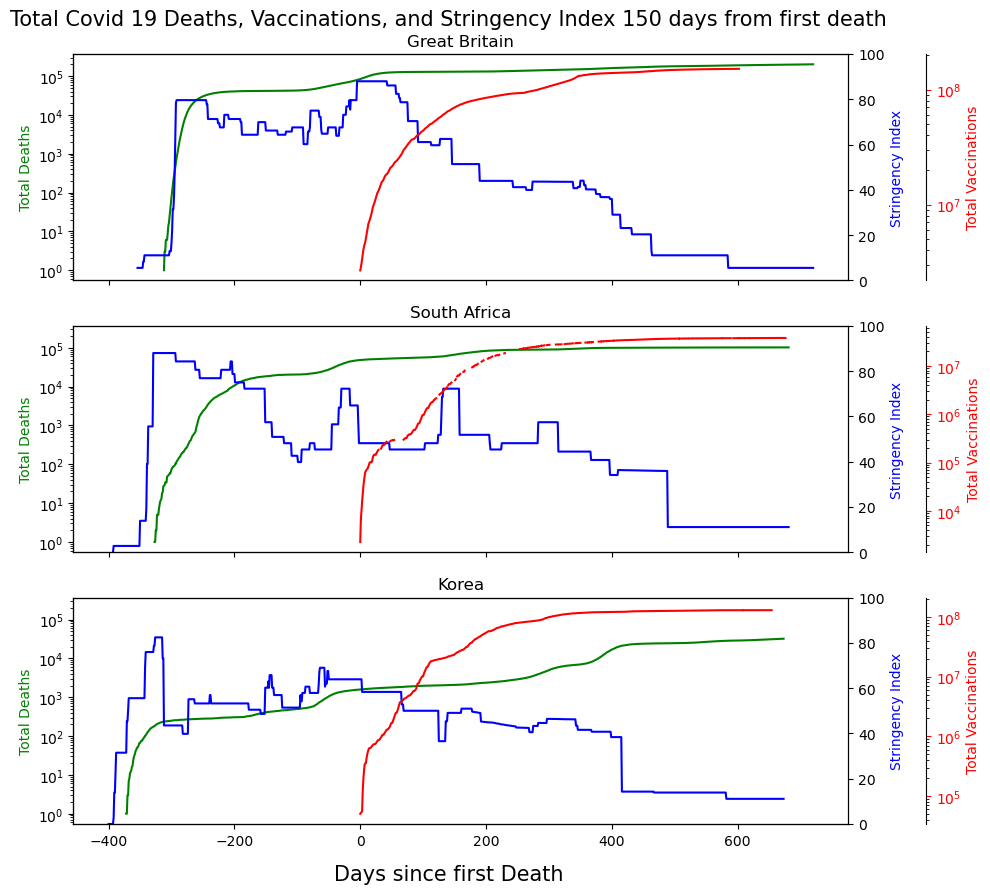

In [73]:
def make_dfs(x):
    y = df[df['iso_code'].str.contains(x)]
    y['date'] = y['date'].apply(pd.to_datetime)
    y['Days Since 1st Vaccine'] = (y['date'] - (y.loc[df['total_vaccinations'] >= 1, 'date'].iloc[0])).dt.days
    y = y[y['Days Since 1st Vaccine'] <= 10000]
    y = y[y['Days Since 1st Vaccine'] >= -400]
    y = y[['iso_code', 'total_deaths', 'total_vaccinations', 'stringency_index', 'Days Since 1st Vaccine']]
    y = y[y['stringency_index'].notna()]
    y = y.reset_index(drop=True)
    return y

fig, (ax, ax1, ax2) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
plt.suptitle('Total Covid 19 Deaths, Vaccinations, and Stringency Index 150 days from first death', size=15, weight='ultralight', y=0.925)
fig.supxlabel('Days since first Death', size=15, y=0.05)

isocodes = ['GBR', 'ZAF', 'KOR']
axes = [ax, ax1, ax2]

ax.set(title='Great Britain')
ax1.set(title='South Africa')
ax2.set(title='Korea')

for i, z in zip(isocodes, axes):

    axa = z.twinx()
    axv = z.twinx()

    x = make_dfs(i)['Days Since 1st Vaccine']
    y1 = make_dfs(i)['total_deaths']
    y2 = make_dfs(i)['stringency_index']
    y3 = make_dfs(i)['total_vaccinations']

    z.plot(x, y1, color='g')
    axa.plot(x, y2, color='b')
    axv.plot(x, y3, color='r')

    z.set_ylabel('Total Deaths', color='g')
    z.set(yscale='log')

    axa.set_ylabel('Stringency Index', color='b')
    axa.set_ylim(0, 100)

    axv.spines["right"].set_position(("axes", 1.1))

    axv.set_ylabel('Total Vaccinations', color='r')
    axv.set(yscale='log')

    axv.tick_params(axis='y', colors='r')
    axv.yaxis.label.set_color('r')
    axv.set_ylim(0, axv.get_ylim()[1] * 1.1)


In [43]:
make_dfs('CHL')

,iso_code,total_deaths,total_vaccinations,stringency_index,Days Since 1st Vaccine
0,CHL,NaN,NaN,0.00,-337
1,CHL,NaN,NaN,0.00,-336
2,CHL,NaN,NaN,0.00,-335
3,CHL,NaN,NaN,0.00,-334
4,CHL,NaN,NaN,0.00,-333
...,...,...,...,...,...
733,CHL,39512.0,46310098.0,29.73,396
734,CHL,39535.0,46402434.0,29.71,397
735,CHL,39543.0,46482312.0,29.69,398
736,CHL,39547.0,46553696.0,29.67,399


In [ ]:
fig, (ax, ax1, ax2) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
plt.suptitle('Total Covid 19 Deaths, Vaccinations, and Stringency Index 150 days from first death', size=15, weight='ultralight', y=0.925)
fig.supxlabel('Days since first Death', size=15, y=0.05)

isocodes = ['GBR', 'ZAF', 'KOR']
axes = [ax, ax1, ax2]

ax.set(title='Great Britain')
ax1.set(title='South Africa')
ax2.set(title='Korea')


for i, z in zip(isocodes, axes):

    axa = z.twinx()

    x = make_dfs(i)['Days Since 1st Vaccine']
    y1 = make_dfs(i)['total_deaths']
    y2 = make_dfs(i)['stringency_index']
    y3 = make_dfs(i)['total_vaccinations']

    z.plot(x, y1, color='g')
    axa.plot(x, y2, color='b')
    axa.plot(x, y3, color='r')

    z.set_ylabel('Total Deaths/Vaccinations', color='g')
    z.set(yscale='log')

    axa.set_ylabel('Stringency Index', color='b')
    axa.set_ylim(0, 100)

    axa.spines["right"].set_position(("axes", 1.1))
    axa.tick_params(axis='y', colors='r')
    axa.yaxis.label.set_color('r')
    axa.set_ylim(0, axa.get_ylim()[1] * 1.1)

